In [1]:
# case study of Oh point group 
import numpy as np 
from group import MatrixGroup
from spherical import R_X, R_Y, R_Z 

from molecular_vib import vibration_space

# case study, a 2D square molecuar of symmetry C4v 
molecular = {"na":7, 
             "position":np.array([[0,0,0],[1,0,0],[-1,0,0],[0,1,0],[0,-1,0],[0,0,1],[0,0,-1]]),
             "type": [1,0,0,0,0,0,0]
            }
Tetra = vibration_space(molecular)
#Oh 
Id = np.eye(3)
th = np.pi/2
Rx90 = R_X(np.pi/2)
Ry90 = R_Y(np.pi/2)
Rz90 = R_Z(np.pi/2)
sigma_d = np.array([[0,1,0],[1,0,0],[0,0,1]])
Oh = MatrixGroup(generator = [Id,Rx90,Ry90,Rz90,sigma_d])
print(f'|Oh| = {Oh.nG}')
if Oh.nG!=48:
   raise ValueError('# of elements in Oh is inconsistent')
Oh.constructMultiplicationTable()
Oh.conjugacy_class()
if Oh.nClass!=10:
   raise ValueError('# of conjugacy classes in Oh is inconsistent')
print('Oh ConjClass = ',Oh.ConjClass)
#
from BDS import character_solver
ChiSolver = character_solver(Oh.MultilicationTable, Oh.ConjClass)
chi_table = ChiSolver.solve()
print('Character table of Oh = ')
for i in range(Oh.nClass):
   print(" ".join(f"{x:10.2f}" for x in chi_table[:,i]))  # Format numbers to 2 decimal places
#apply C4v to the polynomial of (x,y)
# build the matrix representtaion of C4v on linear function of (x,y)
# Here, it is coincidently the same as the original C4v, for cubic or quadratic, it will be different. 
Oh.decompose(Oh.G, chi_table)
Oh.build_explicit_IRmatrix(chi_table)

#
Tetra.RepOfGroup(Oh)
Multiplicity = Oh.decompose(Tetra.G, chi_table)
print('Multiplicity = ',Multiplicity)
basis = Oh.basis_function(Tetra.G, chi_table, excluded_space=Tetra.acoustic_translation_mode())
#basis = C4v.basis_function(square.G, chi_table)
dim = 0 
for ir in range(Oh.nClass):
   if len(basis[ir])==0:
      print(f'{ir+1}-IR, chi = {chi_table[:,ir]}, multiplicity = 0, space dim = {0}') 
   else:
      print(f'{ir+1}-IR, chi = {chi_table[:,ir]}, multiplicity = {int(len(basis[ir][0])/int(chi_table[0,ir]+1e-4))}, space dim = {len(basis[ir][0])}') 
   dim = dim + len(basis[ir][0])
print('# of vibration modes = ', dim)


|Oh| = 48
[[ 0  1  2 ... 45 46 47]
 [ 1  5  6 ... 35 30 31]
 [ 2  7  9 ... 36  1 28]
 ...
 [45 23 35 ... 40 11 10]
 [46 19 34 ... 42 10 11]
 [47 32 31 ... 12 39  6]]
E = 0
Oh ConjClass =  [[0], [1, 2, 3, 18, 29, 34], [4, 23, 26, 35, 36, 37], [5, 9, 13], [6, 7, 10, 12, 38, 40, 44, 46], [8, 11, 15, 16, 39, 42, 45, 47], [14, 17, 41], [19, 20, 22, 24, 25, 30], [21, 27, 28, 31, 32, 33], [43]]
index_Class =  [0 1 1 1 2 3 4 4 5 3 4 5 4 3 6 5 5 6 1 7 7 8 7 2 7 7 2 8 8 1 7 8 8 8 1 2 2
 2 4 5 4 6 5 9 4 5 4 5]
Character table of Oh = 
      1.00       1.00       1.00       1.00       1.00       1.00       1.00       1.00       1.00       1.00
      1.00      -1.00      -1.00       1.00       1.00       1.00       1.00      -1.00      -1.00       1.00
      1.00       1.00      -1.00       1.00       1.00      -1.00      -1.00       1.00      -1.00      -1.00
      1.00      -1.00       1.00       1.00       1.00      -1.00      -1.00      -1.00       1.00      -1.00
      2.00       0.00       0.

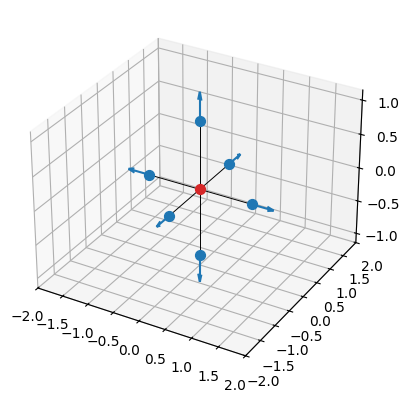

In [7]:
#visualize 2D modes 

ax = Tetra.visualize_mode_3D(basis[0][:,0], clist=['tab:blue','tab:red'])
#
a = Tetra.molecular['position'][0]
for i in range(6):
   b =  Tetra.molecular['position'][1+i]
   ax.plot([a[0],b[0]],[a[1],b[1]],[a[2],b[2]], color='k', linewidth=0.7)


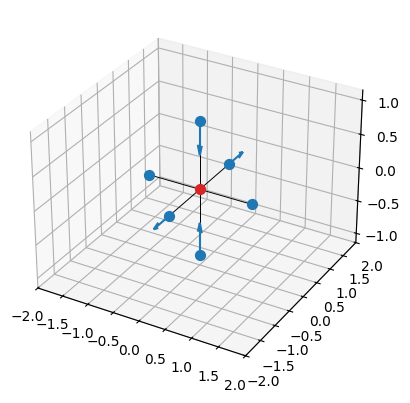

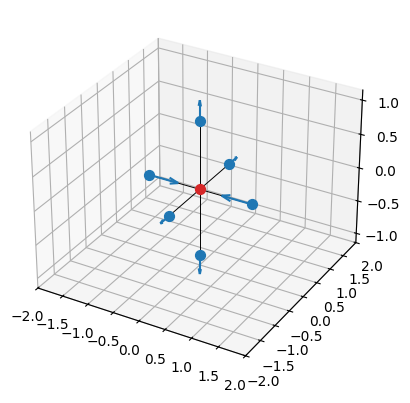

In [9]:
#visualize 2D modes 

ax = Tetra.visualize_mode_3D(basis[4][:,0], clist=['tab:blue','tab:red'])
#
a = Tetra.molecular['position'][0]
for i in range(6):
   b =  Tetra.molecular['position'][1+i]
   ax.plot([a[0],b[0]],[a[1],b[1]],[a[2],b[2]], color='k', linewidth=0.7)


ax = Tetra.visualize_mode_3D(basis[4][:,1], clist=['tab:blue','tab:red'])
#
a = Tetra.molecular['position'][0]
for i in range(6):
   b =  Tetra.molecular['position'][1+i]
   ax.plot([a[0],b[0]],[a[1],b[1]],[a[2],b[2]], color='k', linewidth=0.7)


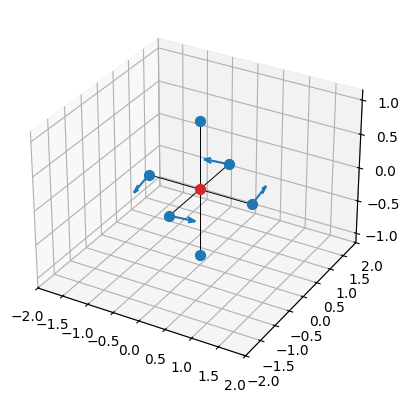

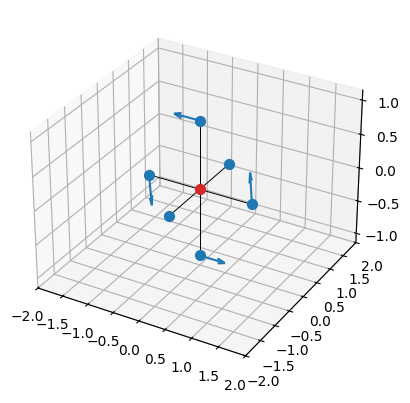

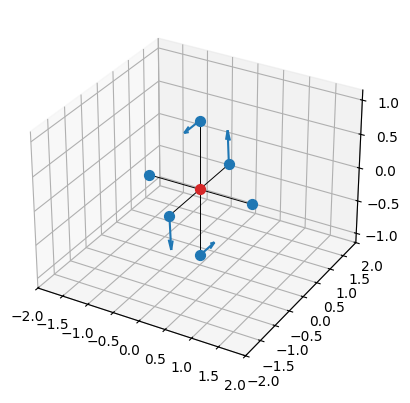

In [10]:
ax = Tetra.visualize_mode_3D(basis[6][:,0], clist=['tab:blue','tab:red'])
#
a = Tetra.molecular['position'][0]
for i in range(6):
   b =  Tetra.molecular['position'][1+i]
   ax.plot([a[0],b[0]],[a[1],b[1]],[a[2],b[2]], color='k', linewidth=0.7)

ax = Tetra.visualize_mode_3D(basis[6][:,1], clist=['tab:blue','tab:red'])
#
a = Tetra.molecular['position'][0]
for i in range(6):
   b =  Tetra.molecular['position'][1+i]
   ax.plot([a[0],b[0]],[a[1],b[1]],[a[2],b[2]], color='k', linewidth=0.7)

ax = Tetra.visualize_mode_3D(basis[6][:,2], clist=['tab:blue','tab:red'])
#
a = Tetra.molecular['position'][0]
for i in range(6):
   b =  Tetra.molecular['position'][1+i]
   ax.plot([a[0],b[0]],[a[1],b[1]],[a[2],b[2]], color='k', linewidth=0.7)

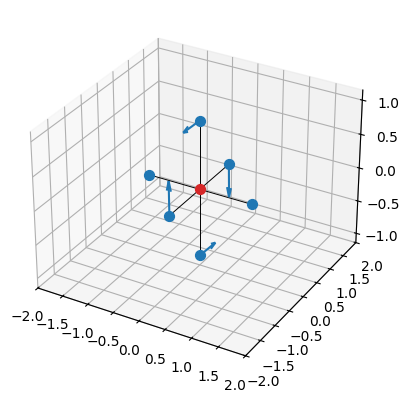

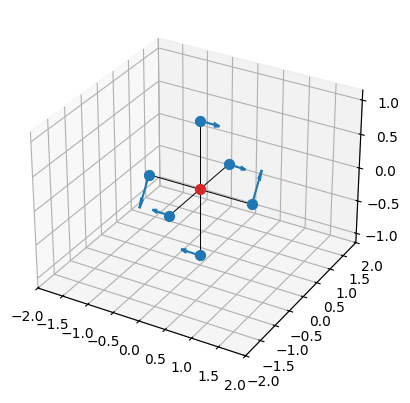

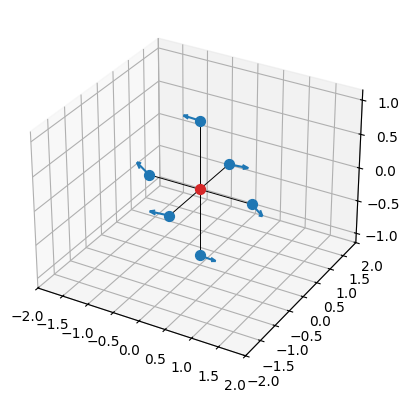

In [11]:
ax = Tetra.visualize_mode_3D(basis[7][:,0], clist=['tab:blue','tab:red'])
#
a = Tetra.molecular['position'][0]
for i in range(6):
   b =  Tetra.molecular['position'][1+i]
   ax.plot([a[0],b[0]],[a[1],b[1]],[a[2],b[2]], color='k', linewidth=0.7)

ax = Tetra.visualize_mode_3D(basis[7][:,1], clist=['tab:blue','tab:red'])
#
a = Tetra.molecular['position'][0]
for i in range(6):
   b =  Tetra.molecular['position'][1+i]
   ax.plot([a[0],b[0]],[a[1],b[1]],[a[2],b[2]], color='k', linewidth=0.7)

ax = Tetra.visualize_mode_3D(basis[7][:,2], clist=['tab:blue','tab:red'])
#
a = Tetra.molecular['position'][0]
for i in range(6):
   b =  Tetra.molecular['position'][1+i]
   ax.plot([a[0],b[0]],[a[1],b[1]],[a[2],b[2]], color='k', linewidth=0.7)

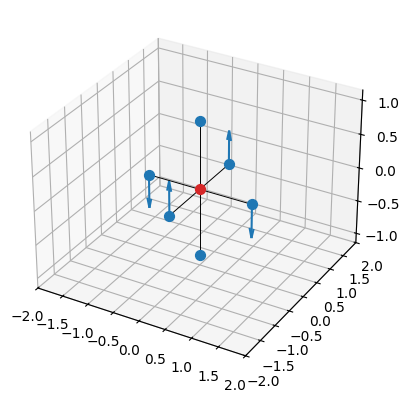

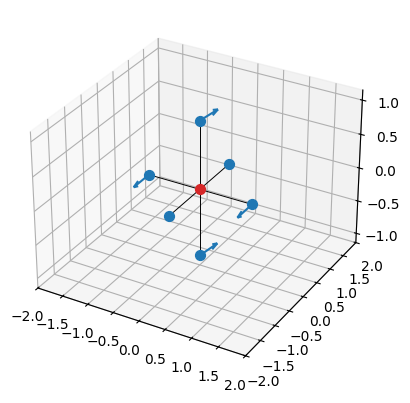

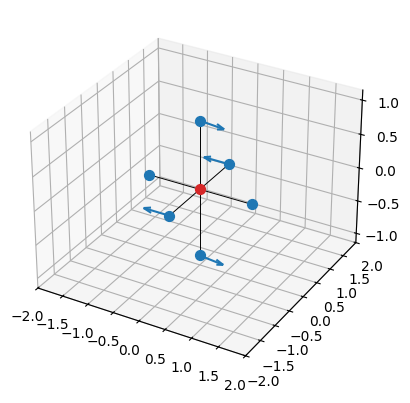

In [12]:
ax = Tetra.visualize_mode_3D(basis[8][:,0], clist=['tab:blue','tab:red'])
#
a = Tetra.molecular['position'][0]
for i in range(6):
   b =  Tetra.molecular['position'][1+i]
   ax.plot([a[0],b[0]],[a[1],b[1]],[a[2],b[2]], color='k', linewidth=0.7)

ax = Tetra.visualize_mode_3D(basis[8][:,1], clist=['tab:blue','tab:red'])
#
a = Tetra.molecular['position'][0]
for i in range(6):
   b =  Tetra.molecular['position'][1+i]
   ax.plot([a[0],b[0]],[a[1],b[1]],[a[2],b[2]], color='k', linewidth=0.7)

ax = Tetra.visualize_mode_3D(basis[8][:,2], clist=['tab:blue','tab:red'])
#
a = Tetra.molecular['position'][0]
for i in range(6):
   b =  Tetra.molecular['position'][1+i]
   ax.plot([a[0],b[0]],[a[1],b[1]],[a[2],b[2]], color='k', linewidth=0.7)

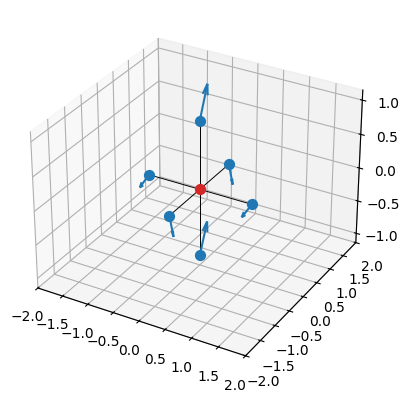

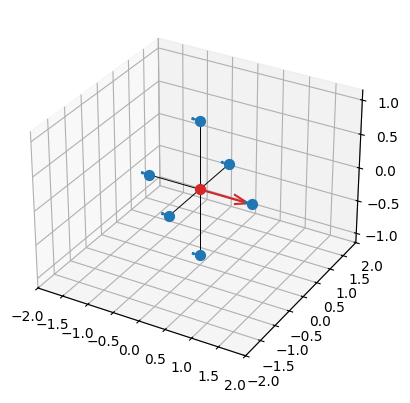

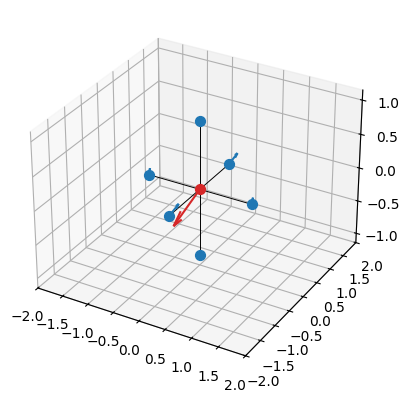

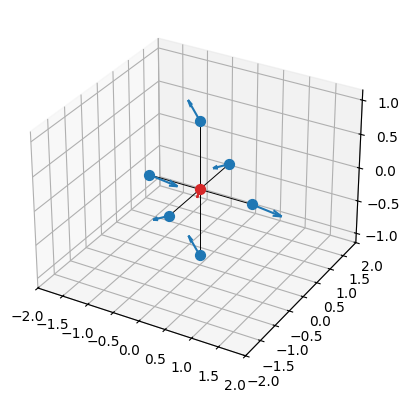

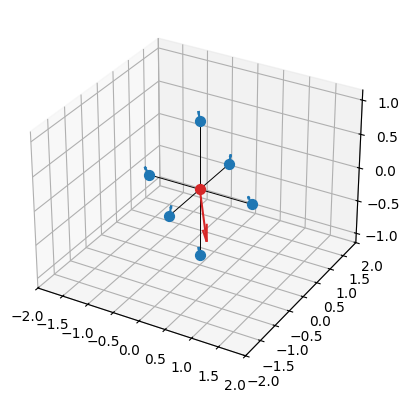

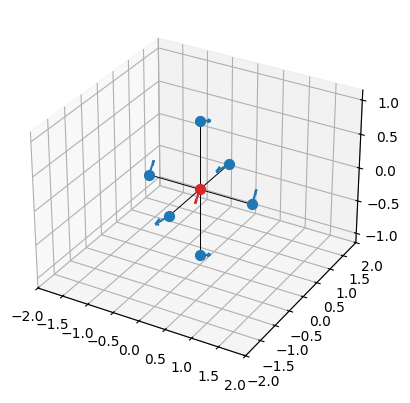

In [13]:
for ic in range(6):
   ax = Tetra.visualize_mode_3D(basis[9][:,ic], clist=['tab:blue','tab:red'])
   #
   a = Tetra.molecular['position'][0]
   for i in range(6):
      b =  Tetra.molecular['position'][1+i]
      ax.plot([a[0],b[0]],[a[1],b[1]],[a[2],b[2]], color='k', linewidth=0.7)

